## This dataset is meant to provide input which can be used to predict the likelihood that the patient will suffer a heart attack. It can be found here:
https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [79]:
df = pd.read_csv('heart.csv')

In [80]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [81]:
# Check for missing values
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

### There are no missing values.

### Rename the columns to make them clearer.

In [84]:
df.rename(columns={'cp': 'chest_pain_type', 'trtbps': 'resting_bp', 'chol': 'cholesterol', 'fbs': 'fasting_blood_sugar', 'restecg': 'resting_ecg', 'thalachh': 'max_heart_rate', 'exng': 'exercise_induced_angina', 'oldpeak': 'previous peak'}, inplace=True)
df.rename(columns={'slp': 'slope', 'caa': 'num_major_vessels', 'thall': 'thal_rate', 'output': 'risk_level'}, inplace=True)

In [85]:
df.head()

,age,sex,chest_pain_type,resting_bp,cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_induced_angina,previous peak,slope,num_major_vessels,thal_rate,risk_level
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### The target variable, Risk Level, has values 0 (less chance of heart attack) and 1 (more chance of heart attack).

## -------------------------------------------------------------------------------------

## Exploratory Data Analysis

In [89]:
# Check for missing values in the dataFrame
print(df.isnull().values.any()) 

False


### There are no missing values.

In [91]:
# Check value types
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      303 non-null    int64  
 1   sex                      303 non-null    int64  
 2   chest_pain_type          303 non-null    int64  
 3   resting_bp               303 non-null    int64  
 4   cholesterol              303 non-null    int64  
 5   fasting_blood_sugar      303 non-null    int64  
 6   resting_ecg              303 non-null    int64  
 7   max_heart_rate           303 non-null    int64  
 8   exercise_induced_angina  303 non-null    int64  
 9   previous peak            303 non-null    float64
 10  slope                    303 non-null    int64  
 11  num_major_vessels        303 non-null    int64  
 12  thal_rate                303 non-null    int64  
 13  risk_level               303 non-null    int64  
dtypes: float64(1), int64(13)
m

In [92]:
# Get summary statistics for columns
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
chest_pain_type,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
resting_bp,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
cholesterol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fasting_blood_sugar,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
resting_ecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
max_heart_rate,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exercise_induced_angina,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
previous peak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [93]:
# Get number of unique values for each column

dict = {}
for i in list(df.columns):
    dict[i] = df[i].value_counts().shape[0]

pd.DataFrame(dict,index=["unique count"]).transpose()

,unique count
age,41
sex,2
chest_pain_type,4
resting_bp,49
cholesterol,152
fasting_blood_sugar,2
resting_ecg,3
max_heart_rate,91
exercise_induced_angina,2
previous peak,40


In [94]:
import seaborn as sns
import matplotlib.pyplot as plt

In [95]:
correlation_matrix = df.corr()

In [96]:
print(correlation_matrix)

                              age       sex  chest_pain_type  resting_bp  \
age                      1.000000 -0.098447        -0.068653    0.279351   
sex                     -0.098447  1.000000        -0.049353   -0.056769   
chest_pain_type         -0.068653 -0.049353         1.000000    0.047608   
resting_bp               0.279351 -0.056769         0.047608    1.000000   
cholesterol              0.213678 -0.197912        -0.076904    0.123174   
fasting_blood_sugar      0.121308  0.045032         0.094444    0.177531   
resting_ecg             -0.116211 -0.058196         0.044421   -0.114103   
max_heart_rate          -0.398522 -0.044020         0.295762   -0.046698   
exercise_induced_angina  0.096801  0.141664        -0.394280    0.067616   
previous peak            0.210013  0.096093        -0.149230    0.193216   
slope                   -0.168814 -0.030711         0.119717   -0.121475   
num_major_vessels        0.276326  0.118261        -0.181053    0.101389   
thal_rate   

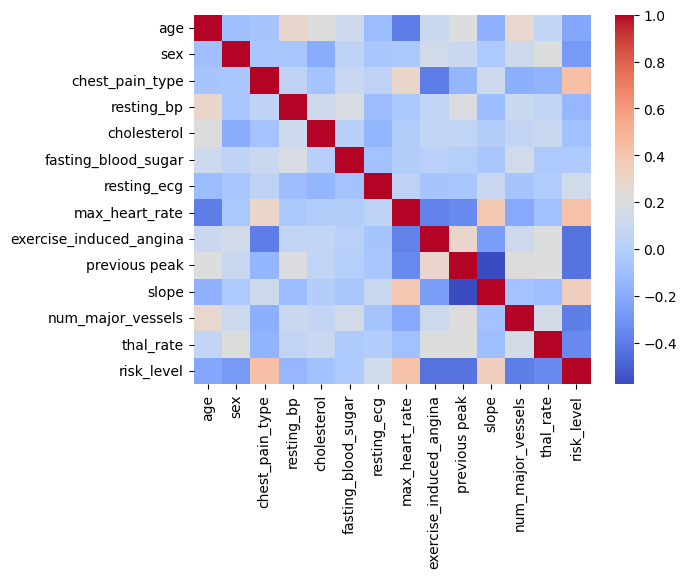

In [97]:
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.show()

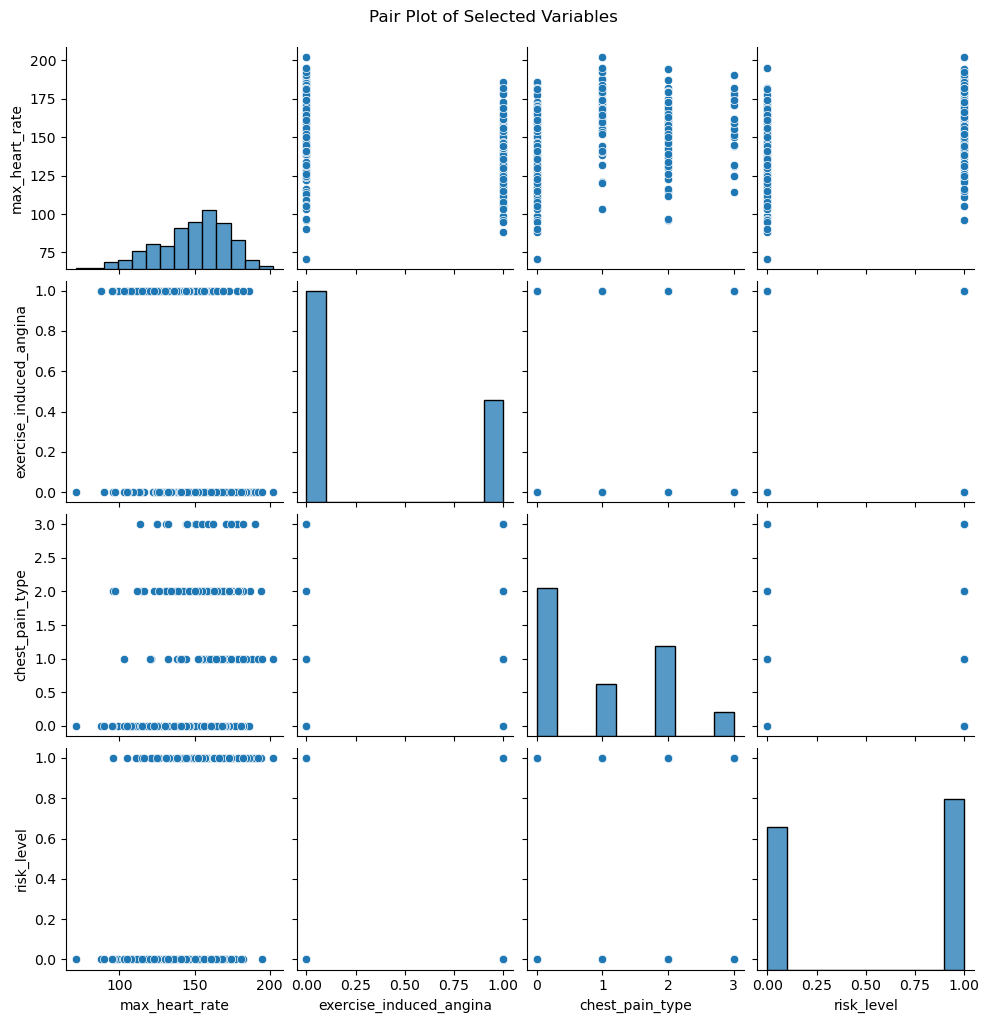

In [98]:
selected_columns = ['max_heart_rate', 'exercise_induced_angina', 'chest_pain_type', 'risk_level']
sns.pairplot(df[selected_columns])
plt.suptitle('Pair Plot of Selected Variables', y=1.02)
plt.show()

## Find and Visualize Mutual Information Scores:

In [100]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
df = df.apply(le.fit_transform)
df.head()

,age,sex,chest_pain_type,resting_bp,cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_induced_angina,previous peak,slope,num_major_vessels,thal_rate,risk_level
0,29,1,3,31,64,1,0,49,0,22,0,0,1,1
1,3,1,2,22,80,0,1,84,0,32,0,0,2,1
2,7,0,1,22,35,0,0,71,0,14,2,0,2,1
3,22,1,1,14,67,0,1,76,0,8,2,0,2,1
4,23,0,0,14,145,0,1,62,1,6,2,0,2,1


In [101]:
X= df.drop('risk_level',axis=1)
y= df.risk_level         

#changing object dtype to int dtype
for colname in X.select_dtypes("object"):
    X[colname], _ = X[colname].factorize()

In [102]:
X.dtypes

age                        int64
sex                        int64
chest_pain_type            int64
resting_bp                 int64
cholesterol                int64
fasting_blood_sugar        int64
resting_ecg                int64
max_heart_rate             int64
exercise_induced_angina    int64
previous peak              int64
slope                      int64
num_major_vessels          int64
thal_rate                  int64
dtype: object

In [103]:
from sklearn.feature_selection import mutual_info_classif

mi_scores = mutual_info_classif(X, y)
mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
mi_scores = mi_scores.sort_values(ascending=False)

mi_scores # show features with their MI scores

chest_pain_type            0.201357
previous peak              0.136969
thal_rate                  0.136668
num_major_vessels          0.134568
sex                        0.094272
exercise_induced_angina    0.083537
cholesterol                0.063525
max_heart_rate             0.063194
slope                      0.057510
resting_ecg                0.008012
age                        0.000000
resting_bp                 0.000000
fasting_blood_sugar        0.000000
Name: MI Scores, dtype: float64

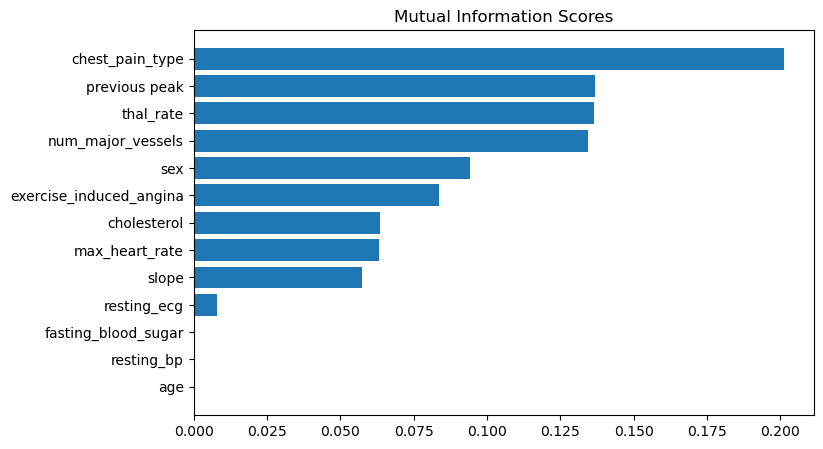

In [104]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)

## Prepare Models

In [106]:
#test train split

from sklearn.model_selection import train_test_split

# dataset split
# creating a function for dataset split
def dataset(X,y):
    train_full_X, val_X, train_full_y, val_y = train_test_split(X, y,test_size=0.2,random_state = 0)

# Use the same function above for the validation set
    train_X, test_X, train_y, test_y = train_test_split(train_full_X, train_full_y, test_size=0.25,random_state = 0)
    return (train_X, val_X, train_y, val_y)

In [107]:
from sklearn.preprocessing import MinMaxScaler

def scale(X):
    scaler = MinMaxScaler()
    scaler.fit(X)
    return X

### Random Forest Classifier

In [109]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [110]:
X = pd.get_dummies(X)
X= scale(X)
y = df.risk_level       

X_train,X_val,y_train,y_val= dataset(X,y)

forest_model= RandomForestClassifier(random_state=1)
forest_model.fit(X_train, y_train)
preds= forest_model.predict(X_val)

print('ACCURACY: ',accuracy_score(y_val,preds)*100)
print('AUC score: ',roc_auc_score(y_val,preds))

ACCURACY:  83.60655737704919
AUC score:  0.8376906318082789


### XGB Classifier

In [112]:
from xgboost import XGBClassifier

X = pd.get_dummies(X)
X= scale(X)
y= df.risk_level 

X_train,X_val,y_train,y_val= dataset(X,y)


xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)
prediction_xgb = xgb_model.predict(X_val)
print('ACCURACY: ',accuracy_score(y_val, prediction_xgb)*100)
print('AUC score: ',roc_auc_score(y_val,prediction_xgb))

ACCURACY:  83.60655737704919
AUC score:  0.8338779956427016


## Conclusion: The two models are nearly indistinguishable in quality, with the same accuracy and almost identical AUC scores.

# Perform cross-validation:

In [115]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold, cross_val_score

In [116]:
clf = DecisionTreeClassifier(random_state=42)

In [117]:
k_folds = KFold(n_splits = 5)

scores = cross_val_score(clf, X, y, cv = k_folds)

In [118]:
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Cross Validation Scores:  [0.63934426 0.57377049 0.72131148 0.8        0.61666667]
Average CV Score:  0.6702185792349726
Number of CV Scores used in Average:  5
